In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tools.plotting import scatter_matrix
import statsmodels.api as sm
%matplotlib inline

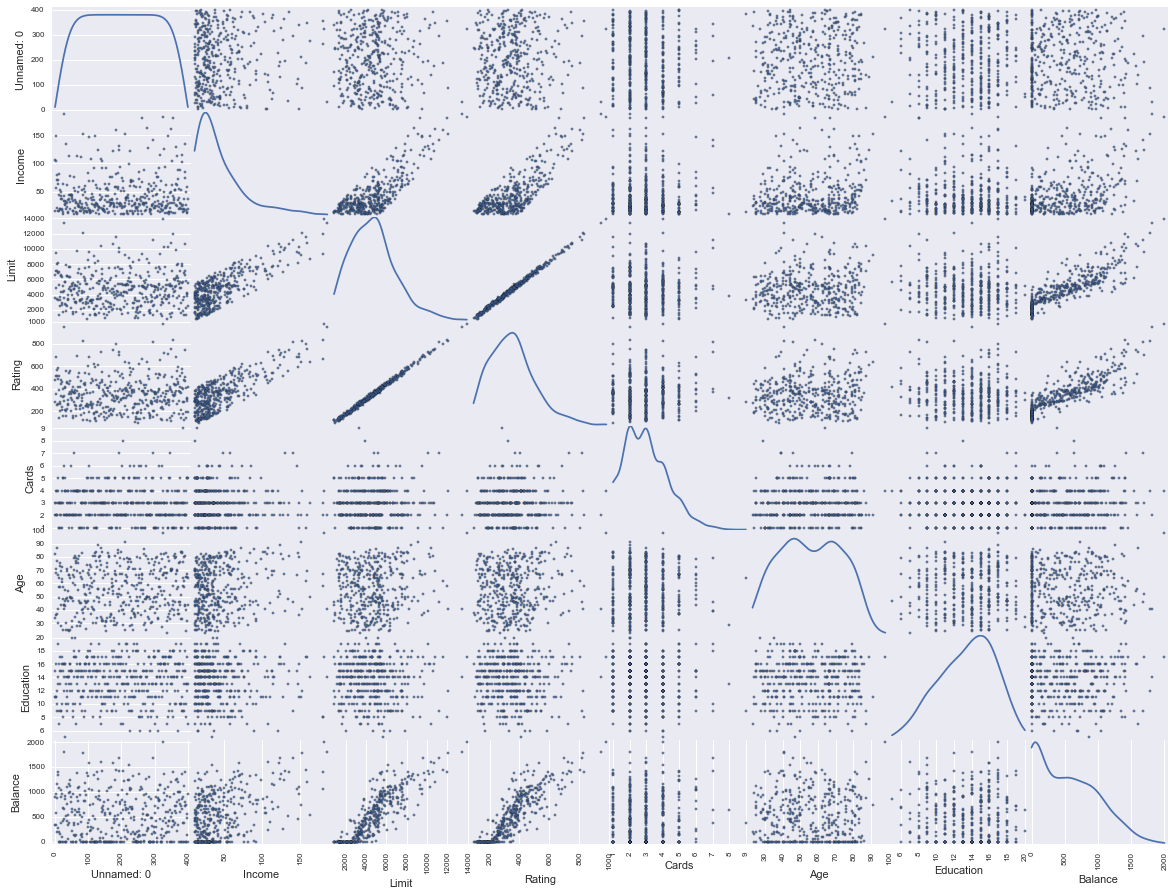

'Rating and Limit look positively correlated to the Balance (they also look very colinear). There does not seem\nto be much a strong relationship to Balance for the other variables (there might be some relationship with income).\nThe distribution of variables looks fairly even (normal?) for Age, Education, and "unnamed". However\nthe dstribution of income, limit, and rating look heavily right-tailed (even for no. of cards).'

In [142]:
df = pd.read_csv('data/balance.csv')
scatter_matrix(df,alpha=0.8,figsize=(20,15),diagonal='kde')
plt.show()
'''Rating and Limit look positively correlated to the Balance (they also look very colinear). There does not seem
to be much a strong relationship to Balance for the other variables (there might be some relationship with income).
The distribution of variables looks fairly even (normal?) for Age, Education, and "unnamed". However
the dstribution of income, limit, and rating look heavily right-tailed (even for no. of cards).'''

In [143]:
df.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [144]:
df.iloc[df[df['Gender']=='Female'].index,7]=1

In [145]:
df.iloc[df[df['Gender']!=1].index,7]=0

In [146]:
df.iloc[df[df['Married']=='Yes'].index,9]=1
df.iloc[df[df['Married']=='No'].index,9]=0

In [147]:
df.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,0,No,1,Caucasian,333
1,2,106.025,6645,483,3,82,15,1,Yes,1,Asian,903
2,3,104.593,7075,514,4,71,11,0,No,0,Asian,580
3,4,148.924,9504,681,3,36,11,1,No,0,Asian,964
4,5,55.882,4897,357,2,68,16,0,No,1,Caucasian,331


In [148]:
df['Ethnicity'].unique()

array(['Caucasian', 'Asian', 'African American'], dtype=object)

In [149]:
#ethn=pd.Series(['Caucasian', 'Asian', 'African American'])
ethn =pd.get_dummies(df['Ethnicity'])

In [150]:
df=pd.concat([df,ethn],axis=1)

In [151]:
df.drop('African American',axis=1,inplace=True)
df.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Asian,Caucasian
0,1,14.891,3606,283,2,34,11,0,No,1,Caucasian,333,0,1
1,2,106.025,6645,483,3,82,15,1,Yes,1,Asian,903,1,0
2,3,104.593,7075,514,4,71,11,0,No,0,Asian,580,1,0
3,4,148.924,9504,681,3,36,11,1,No,0,Asian,964,1,0
4,5,55.882,4897,357,2,68,16,0,No,1,Caucasian,331,0,1


In [152]:
df.iloc[df[df['Student']=='Yes'].index,8]=1
df.iloc[df[df['Student']=='No'].index,8]=0
df.drop(['Ethnicity'],axis=1,inplace=True)

In [154]:
df.head()
#x.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Balance,Asian,Caucasian
0,1,14.891,3606,283,2,34,11,0,0,1,333,0,1
1,2,106.025,6645,483,3,82,15,1,1,1,903,1,0
2,3,104.593,7075,514,4,71,11,0,0,0,580,1,0
3,4,148.924,9504,681,3,36,11,1,0,0,964,1,0
4,5,55.882,4897,357,2,68,16,0,0,1,331,0,1


In [155]:
x = df.drop(['Balance','Unnamed: 0'], axis=1, inplace=False)
x['intercept']=1
model = sm.OLS(df['Balance'],x.astype(float)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     750.3
Date:                Tue, 03 May 2016   Prob (F-statistic):          1.11e-253
Time:                        16:28:18   Log-Likelihood:                -2398.7
No. Observations:                 400   AIC:                             4821.
Df Residuals:                     388   BIC:                             4869.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Income        -7.8031      0.234    -33.314      0.000        -8.264    -7.343
Limit          0.1909      0.033      5.824      0.000         0.126     0.255
Rating         1.1365      0.491      2.315      0.021         0.171     2.102
Cards         17.7245      4.341      4.083      0.000         9.190    26.259
Age           -0.6139      0.294     -2.088      0.037        -1.192    -0.036
Education     -1.0989      1.598     -0.688      0.492        -4.241     2.043
Gender       -10.6532      9.914     -1.075      0.283       -30.145     8.839
Student      425.7474     16.723     25.459      0.000       392.869   458.626
Married       -8.5339     10.363     -0.824      0.411       -28.908    11.841
Asian         16.8042     14.119      1.190      0.235       -10.955    44.564
Caucasian     10.1070     12.210      0.828      0.408       -13.899    34.113
intercept   -479.2079     35.774    -13.395      0.000      -549.543  -408.873
==============================================================================
Omnibus:                       34.899   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.766
Skew:                           0.782   Prob(JB):                     8.52e-10
Kurtosis:                       3.241   Cond. No.                     3.87e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.87e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

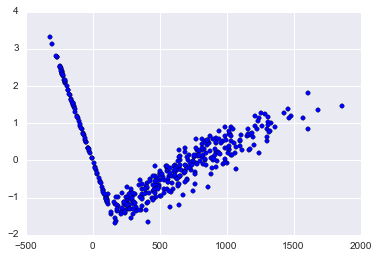

In [156]:
'''The residual plot shows a V shape. Assumptions of linear regression model do not hold'''
model_stud_resids = model.outlier_test()['student_resid']
plt.scatter(model.fittedvalues,model_stud_resids)

'studentized residuals are clearly not normally distributed'

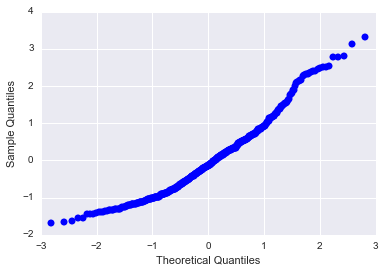

In [157]:
sm.qqplot(model_stud_resids)
'''studentized residuals are clearly not normally distributed'''

In [158]:
'''Now we will try to run the model by excluding from the following possible features: 
Education, Married, Gender, Caucasian'''
iteration_df = x.drop(['Gender','Caucasian'], axis=1, inplace=False)

model2 = sm.OLS(df['Balance'],iteration_df.astype(float)).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     917.3
Date:                Tue, 03 May 2016   Prob (F-statistic):          3.02e-256
Time:                        16:30:32   Log-Likelihood:                -2399.6
No. Observations:                 400   AIC:                             4819.
Df Residuals:                     390   BIC:                             4859.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Income        -7.7980      0.234    -33.327      0.000        -8.258    -7.338
Limit          0.1911      0.033      5.833      0.000         0.127     0.256
Rating         1.1310      0.491      2.305      0.022         0.166     2.096
Cards         17.8353      4.339      4.110      0.000         9.305    26.366
Age           -0.6260      0.294     -2.131      0.034        -1.204    -0.049
Education     -1.1172      1.597     -0.700      0.485        -4.257     2.022
Student      424.5702     16.691     25.437      0.000       391.754   457.386
Married       -8.0501     10.329     -0.779      0.436       -28.357    12.257
Asian          9.6907     11.452      0.846      0.398       -12.825    32.206
intercept   -476.8641     34.218    -13.936      0.000      -544.140  -409.589
==============================================================================
Omnibus:                       34.484   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.161
Skew:                           0.777   Prob(JB):                     1.15e-09
Kurtosis:                       3.239   Cond. No.                     3.67e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.67e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [159]:
'''Now we will try to run the model by excluding the following features: Cards, Education, Asian'''
iteration2_df = iteration_df.drop(['Married', 'Education', 'Asian'], axis=1, inplace=False)

model3 = sm.OLS(df['Balance'],iteration2_df.astype(float)).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     1380.
Date:                Tue, 03 May 2016   Prob (F-statistic):          1.58e-260
Time:                        16:31:26   Log-Likelihood:                -2400.5
No. Observations:                 400   AIC:                             4815.
Df Residuals:                     393   BIC:                             4843.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Income        -7.7951      0.233    -33.395      0.000        -8.254    -7.336
Limit          0.1937      0.032      5.981      0.000         0.130     0.257
Rating         1.0912      0.485      2.251      0.025         0.138     2.044
Cards         18.2119      4.319      4.217      0.000         9.721    26.702
Age           -0.6241      0.292     -2.139      0.033        -1.198    -0.050
Student      425.6099     16.510     25.780      0.000       393.152   458.068
intercept   -493.7342     24.825    -19.889      0.000      -542.540  -444.928
==============================================================================
Omnibus:                       34.091   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.623
Skew:                           0.772   Prob(JB):                     1.51e-09
Kurtosis:                       3.225   Cond. No.                     2.66e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.66e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

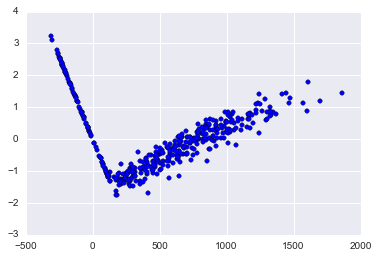

In [160]:
model_stud_resids3 = model3.outlier_test()['student_resid']
plt.scatter(model3.fittedvalues,model_stud_resids3)

In [ ]:
'''No matter what features we drop, the shape of the residuals remains a V. NO IT DOESN'T CHANGE'''

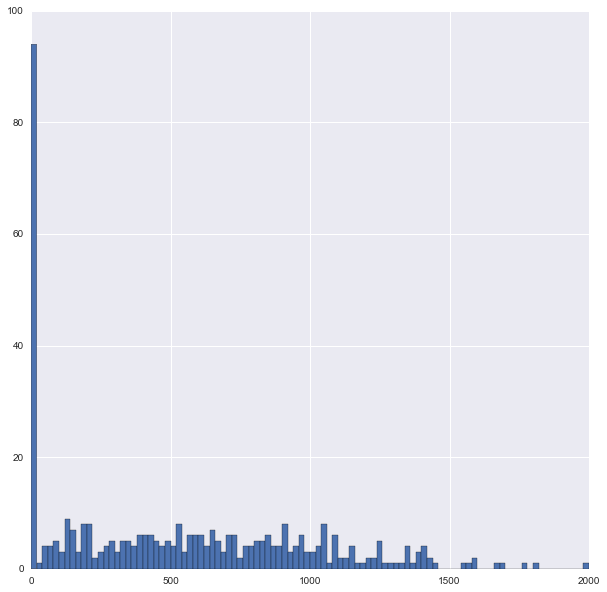

'It looks like a large percentage of our population has a balance of 0.'

In [162]:
#df['Balance'].hist(figsize=(10,10), bins=100)
df['Balance'].hist(figsize=(10,10), bins=100)
plt.show()
'''It looks like a large percentage of our population has a balance of 0.'''

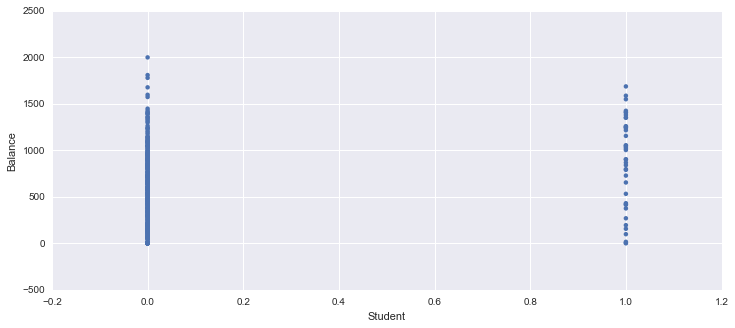

In [163]:
df.plot(kind='scatter', y='Balance', x='Student', edgecolor='none', figsize=(12, 5))
plt.show()

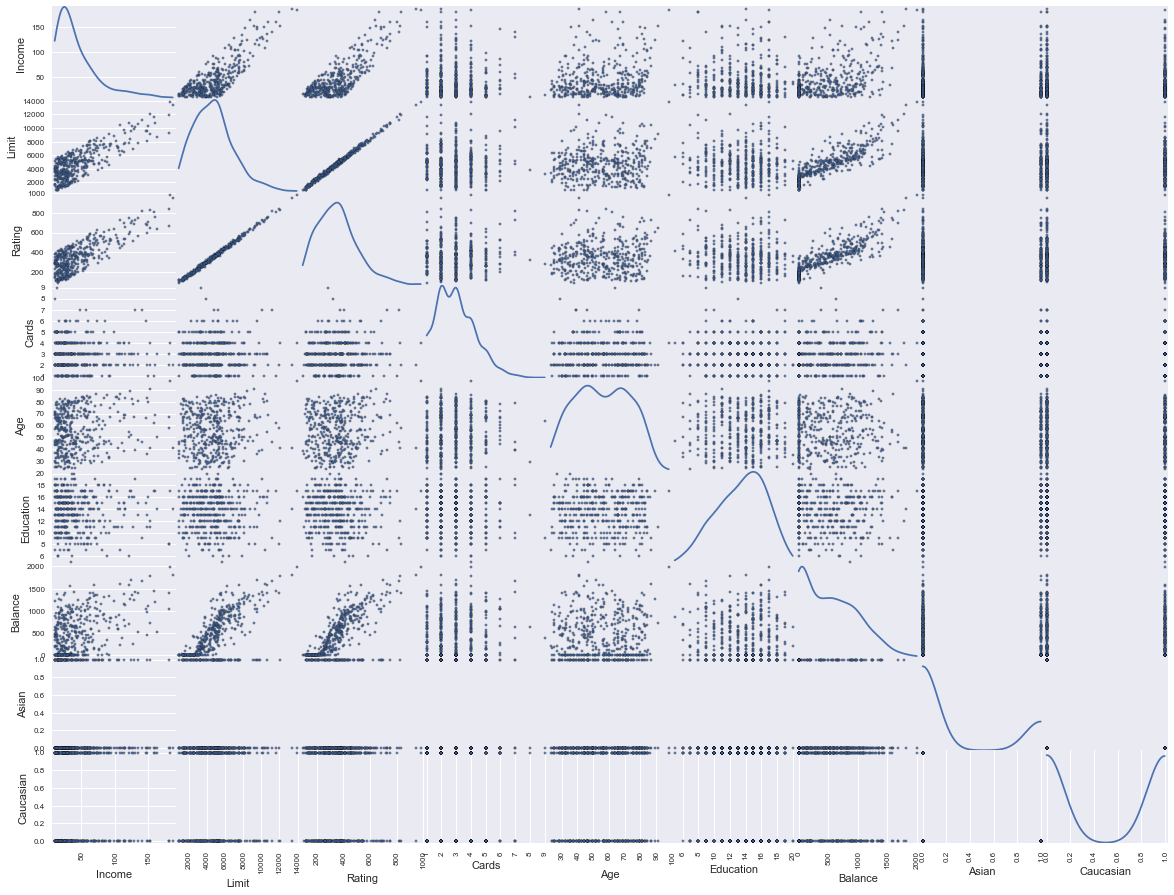

In [167]:
df.drop('Unnamed: 0',inplace=True,axis=1)
scatter_matrix(df,alpha=.8,figsize=(20,15), diagonal='kde')
plt.show()

In [199]:
from sklearn import tree
regr = tree.DecisionTreeClassifier(min_samples_leaf=500)
regr = regr.fit(x,df['Balance'])
#import pydot
#from StringIO import StringIO
#out = StringIO()
with open("dt.dot", 'w') as f:
    export_graphviz(regr, out_file=f)

# export_graphviz(regr, out_file='tree.dot')
#print out.values()

In [130]:
df.head()
#final_df = iteration2_df.drop(['Age', 'Married'], axis=1)
#final_df.count()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Married,Balance,Asian,Caucasian
0,1,14.891,3606,283,2,34,11,0,1,333,0,1
1,2,106.025,6645,483,3,82,15,1,1,903,1,0
2,3,104.593,7075,514,4,71,11,0,0,580,1,0
3,4,148.924,9504,681,3,36,11,1,0,964,1,0
4,5,55.882,4897,357,2,68,16,0,1,331,0,1


In [183]:
df_bal_gtr = df[(df['Rating']>225)&(df['Income']>30)&(df['Limit']>3000)&(df['Student']>0)][['Balance','Rating','Income','Limit','Student']]
df_bal_gtr.count() #194 values out of 400 original ones
df_bal_gtr['intercept']=1
gtr_model = sm.OLS(df_bal_gtr['Balance'],df_bal_gtr[['Student','Rating','Income','Limit','intercept']].astype(float)).fit()
gtr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     726.7
Date:                Tue, 03 May 2016   Prob (F-statistic):           3.87e-18
Time:                        16:57:52   Log-Likelihood:                -102.31
No. Observations:                  21   AIC:                             212.6
Df Residuals:                      17   BIC:                             216.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Student     -110.2813     19.588     -5.630      0.000      -151.609   -68.953
Rating         1.0870      0.698      1.557      0.138        -0.386     2.560
Income       -10.3357      0.333    -31.018      0.000       -11.039    -9.633
Limit          0.2562      0.047      5.419      0.000         0.156     0.356
intercept   -110.2813     19.588     -5.630      0.000      -151.609   -68.953
==============================================================================
Omnibus:                        0.398   Durbin-Watson:                   2.132
Prob(Omnibus):                  0.819   Jarque-Bera (JB):                0.209
Skew:                           0.227   Prob(JB):                        0.901
Kurtosis:                       2.819   Cond. No.                     6.57e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.91e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

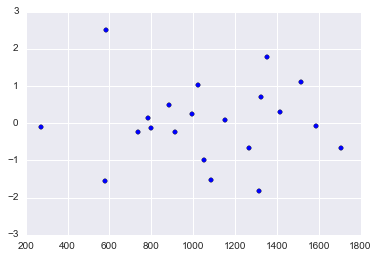

In [184]:
model_gtr_resid = gtr_model.outlier_test()['student_resid']
plt.scatter(gtr_model.fittedvalues,model_gtr_resid)

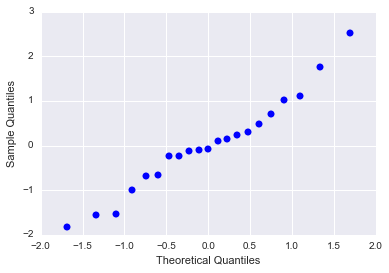

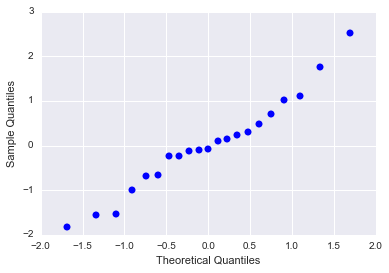

In [189]:
sm.qqplot(model_gtr_resid)

In [185]:
df_bal_less = df[(df['Rating']<=225)|(df['Income']<=30)|(df['Limit']<=3000)|(df['Student']==0)][['Balance','Rating','Income','Limit','Student']]
#df_bal_less.count() #206 values out of 400 original ones
df_bal_less['intercept']=1
less_model = sm.OLS(df_bal_less['Balance'],df_bal_less[['Rating','Income','Limit','Student','intercept']].astype(float)).fit()
less_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     1709.
Date:                Tue, 03 May 2016   Prob (F-statistic):          8.83e-239
Time:                        16:58:41   Log-Likelihood:                -2288.3
No. Observations:                 379   AIC:                             4587.
Df Residuals:                     374   BIC:                             4606.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Rating         2.2095      0.429      5.153      0.000         1.366     3.053
Income        -7.8744      0.249    -31.633      0.000        -8.364    -7.385
Limit          0.1183      0.029      4.109      0.000         0.062     0.175
Student      396.0794     24.301     16.299      0.000       348.296   443.863
intercept   -510.7165     20.735    -24.631      0.000      -551.488  -469.945
==============================================================================
Omnibus:                       21.691   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.359
Skew:                           0.614   Prob(JB):                     5.13e-06
Kurtosis:                       2.812   Cond. No.                     2.46e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.46e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

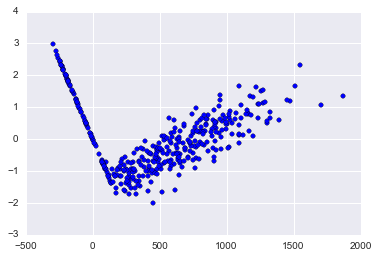

In [186]:
model_less_resid = less_model.outlier_test()['student_resid']
plt.scatter(less_model.fittedvalues,model_less_resid)

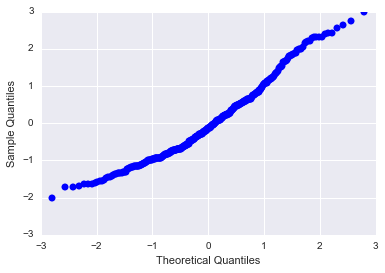

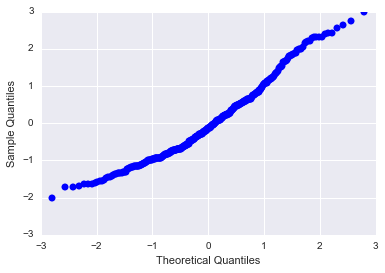

In [188]:
sm.qqplot(model_less_resid)